<a href="https://colab.research.google.com/github/nsmsm/ASL/blob/master/1%EC%B0%A8_%EA%B3%BC%EC%A0%9C_%EB%AC%B8%EC%8A%B9%EB%AA%85_(201985010061)_09_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.utils import plot_model

print(tf.__version__)

2.3.0


In [ ]:
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x = train_x/255.0
test_x = test_x/255.0

import numpy as np

## train, valid set split
np.random.seed(1234)
valid_ind = np.random.choice(np.arange(train_x.shape[0]), 10000, replace=False)
rest_ind = np.setdiff1d(np.arange(train_x.shape[0]), valid_ind)

n_train = 500

train_ind = np.random.choice(rest_ind, n_train, replace=False)

valid_x, valid_y = train_x[valid_ind], train_y[valid_ind]
train_x, train_y = train_x[train_ind], train_y[train_ind]

print(train_x.shape)
print(valid_x.shape)

11493376/11490434 [==============================] - 0s 0us/step
(500, 28, 28)
(10000, 28, 28)


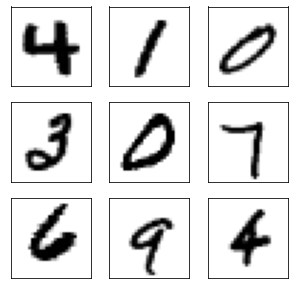

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
for col1 in range(9):
  plt.subplot(3,3,col1+1)
  plt.imshow(train_x[col1], cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
plt.show()

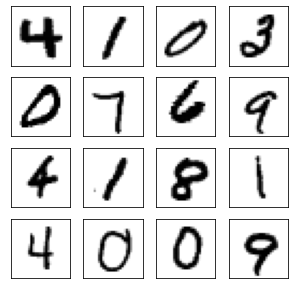

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
for col1 in range(16):
  plt.subplot(4,4,col1+1)
  plt.imshow(train_x[col1], cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
____________________________

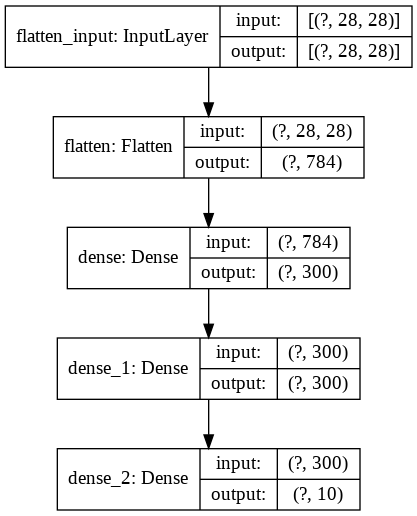

In [ ]:
model = models.Sequential([
  Flatten(input_shape=(28,28)),
  Dense(300, activation='relu'),
  Dense(300, activation='relu'),
  Dense(10, activation='softmax')]
)

model_dr = models.Sequential([
  Flatten(input_shape=(28,28)),
  Dense(300, activation='relu'),
  Dropout(0.7),
  Dense(300, activation='relu'),
  Dropout(0.7),
  Dense(10, activation='softmax')]
)
model.summary()
model_dr.summary()

plot_model(model, to_file='model_mnist.png', show_shapes=True)
plot_model(model, to_file='model_dr_mnist.png', show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_dr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist=model.fit(train_x, train_y, epochs=100, batch_size=100, validation_data=(valid_x, valid_y))
hist_dr=model_dr.fit(train_x, train_y, epochs=100, batch_size=100, validation_data=(valid_x, valid_y))

Epoch 1/100
5/5 [==============================] - 0s 64ms/step - loss: 2.0587 - accuracy: 0.4180 - val_loss: 1.6577 - val_accuracy: 0.6315
Epoch 2/100
5/5 [==============================] - 0s 35ms/step - loss: 1.3383 - accuracy: 0.7380 - val_loss: 1.0765 - val_accuracy: 0.7588
Epoch 3/100
5/5 [==============================] - 0s 35ms/step - loss: 0.8083 - accuracy: 0.8220 - val_loss: 0.7281 - val_accuracy: 0.8015
Epoch 4/100
5/5 [==============================] - 0s 38ms/step - loss: 0.5305 - accuracy: 0.8600 - val_loss: 0.5673 - val_accuracy: 0.8340
Epoch 5/100
5/5 [==============================] - 0s 35ms/step - loss: 0.3772 - accuracy: 0.9140 - val_loss: 0.5045 - val_accuracy: 0.8476
Epoch 6/100
5/5 [==============================] - 0s 36ms/step - loss: 0.2874 - accuracy: 0.9280 - val_loss: 0.4889 - val_accuracy: 0.8506
Epoch 7/100
5/5 [==============================] - 0s 35ms/step - loss: 0.1924 - accuracy: 0.9620 - val_loss: 0.4658 - val_accuracy: 0.8634
Epoch 8/100
5/5 [===

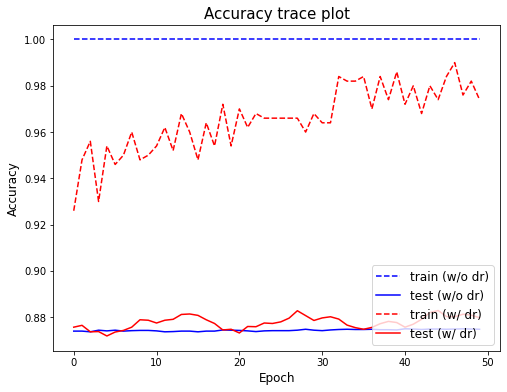

313/313 [==============================] - 1s 2ms/step - loss: 0.4634 - accuracy: 0.8892
Model stats (w/o dropout)
...accuracy: 0.884, loss: 0.557
Model stats (w/ dropout)
...accuracy: 0.889, loss: 0.463


In [ ]:
plt.figure(figsize=(8,6))
plt.plot(hist.history['accuracy'][50:100], 'b--', label='train (w/o dr)')
plt.plot(hist.history['val_accuracy'][50:100], 'b-', label='test (w/o dr)')
plt.plot(hist_dr.history['accuracy'][50:100], 'r--', label='train (w/ dr)')
plt.plot(hist_dr.history['val_accuracy'][50:100], 'r-', label='test (w/ dr)')
#plt.ylim([0.96,1.005])
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.title('Accuracy trace plot', fontsize=15)
plt.show()

sc = model.evaluate(test_x, test_y)
sc_dr = model_dr.evaluate(test_x, test_y)
print('Model stats (w/o dropout)')
print('...accuracy: %.3f, loss: %.3f'%(sc[1], sc[0]))
print('Model stats (w/ dropout)')
print('...accuracy: %.3f, loss: %.3f'%(sc_dr[1], sc_dr[0]))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
__________________________

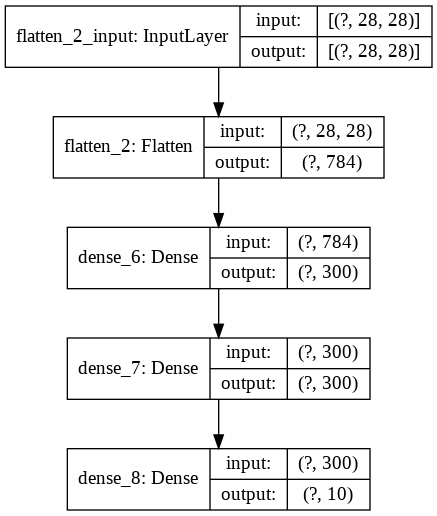

In [ ]:
model = models.Sequential([
  Flatten(input_shape=(28,28)),
  Dense(300, activation='relu'),
  Dense(300, activation='relu'),
  Dense(10, activation='softmax')]
)

model_dr = models.Sequential([
  Flatten(input_shape=(28,28)),
  Dense(300, activation='relu'),
  Dense(300, activation='relu'),
  Dense(10, activation='softmax')]
)
model.summary()
model_dr.summary()

plot_model(model, to_file='model_mnist.png', show_shapes=True)
plot_model(model, to_file='model_dr_mnist.png', show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_dr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist=model.fit(train_x, train_y, epochs=100, batch_size=100, validation_data=(valid_x, valid_y))
hist_dr=model_dr.fit(train_x, train_y, epochs=100, batch_size=100, validation_data=(valid_x, valid_y))

Epoch 1/100
5/5 [==============================] - 0s 58ms/step - loss: 2.0779 - accuracy: 0.3520 - val_loss: 1.6941 - val_accuracy: 0.6462
Epoch 2/100
5/5 [==============================] - 0s 34ms/step - loss: 1.3767 - accuracy: 0.7340 - val_loss: 1.0882 - val_accuracy: 0.7488
Epoch 3/100
5/5 [==============================] - 0s 34ms/step - loss: 0.8427 - accuracy: 0.8120 - val_loss: 0.7167 - val_accuracy: 0.8266
Epoch 4/100
5/5 [==============================] - 0s 37ms/step - loss: 0.5359 - accuracy: 0.8740 - val_loss: 0.5731 - val_accuracy: 0.8338
Epoch 5/100
5/5 [==============================] - 0s 37ms/step - loss: 0.3722 - accuracy: 0.9080 - val_loss: 0.5071 - val_accuracy: 0.8501
Epoch 6/100
5/5 [==============================] - 0s 38ms/step - loss: 0.2652 - accuracy: 0.9400 - val_loss: 0.4835 - val_accuracy: 0.8561
Epoch 7/100
5/5 [==============================] - 0s 34ms/step - loss: 0.1971 - accuracy: 0.9460 - val_loss: 0.4749 - val_accuracy: 0.8565
Epoch 8/100
5/5 [===

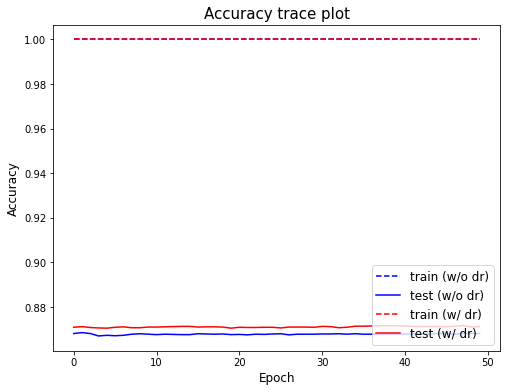

313/313 [==============================] - 1s 2ms/step - loss: 0.5561 - accuracy: 0.8819
Model stats (w/o dropout)
...accuracy: 0.882, loss: 0.567
Model stats (w/ dropout)
...accuracy: 0.882, loss: 0.556


In [ ]:
plt.figure(figsize=(8,6))
plt.plot(hist.history['accuracy'][50:100], 'b--', label='train (w/o dr)')
plt.plot(hist.history['val_accuracy'][50:100], 'b-', label='test (w/o dr)')
plt.plot(hist_dr.history['accuracy'][50:100], 'r--', label='train (w/ dr)')
plt.plot(hist_dr.history['val_accuracy'][50:100], 'r-', label='test (w/ dr)')
#plt.ylim([0.96,1.005])
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.title('Accuracy trace plot', fontsize=15)
plt.show()

sc = model.evaluate(test_x, test_y)
sc_dr = model_dr.evaluate(test_x, test_y)
print('Model stats (w/o dropout)')
print('...accuracy: %.3f, loss: %.3f'%(sc[1], sc[0]))
print('Model stats (w/ dropout)')
print('...accuracy: %.3f, loss: %.3f'%(sc_dr[1], sc_dr[0]))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_19 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
__________________________

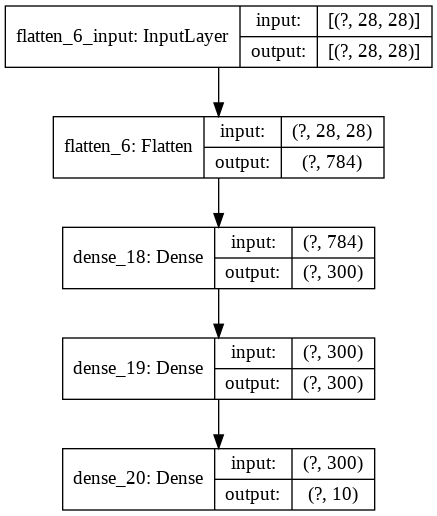

In [ ]:
model = models.Sequential([
  Flatten(input_shape=(28,28)),
  Dense(300, activation='relu'),
  Dense(300, activation='relu'),
  Dense(10, activation='softmax')]
)

model_dr = models.Sequential([
  Flatten(input_shape=(28,28)),
  Dense(300, activation='relu'),
  Dropout(0.5),
  Dense(300, activation='relu'),
  Dropout(0.5),
  Dense(10, activation='softmax')]
)
model.summary()
model_dr.summary()

plot_model(model, to_file='model_mnist.png', show_shapes=True)
plot_model(model, to_file='model_dr_mnist.png', show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_dr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist=model.fit(train_x, train_y, epochs=100, batch_size=100, validation_data=(valid_x, valid_y))
hist_dr=model_dr.fit(train_x, train_y, epochs=100, batch_size=100, validation_data=(valid_x, valid_y))

Epoch 1/100
5/5 [==============================] - 0s 57ms/step - loss: 2.0903 - accuracy: 0.2960 - val_loss: 1.7028 - val_accuracy: 0.5657
Epoch 2/100
5/5 [==============================] - 0s 36ms/step - loss: 1.3961 - accuracy: 0.6820 - val_loss: 1.1160 - val_accuracy: 0.7429
Epoch 3/100
5/5 [==============================] - 0s 34ms/step - loss: 0.8612 - accuracy: 0.8280 - val_loss: 0.7367 - val_accuracy: 0.8171
Epoch 4/100
5/5 [==============================] - 0s 35ms/step - loss: 0.5354 - accuracy: 0.8600 - val_loss: 0.5650 - val_accuracy: 0.8415
Epoch 5/100
5/5 [==============================] - 0s 36ms/step - loss: 0.3625 - accuracy: 0.9180 - val_loss: 0.4922 - val_accuracy: 0.8543
Epoch 6/100
5/5 [==============================] - 0s 34ms/step - loss: 0.2657 - accuracy: 0.9420 - val_loss: 0.4751 - val_accuracy: 0.8549
Epoch 7/100
5/5 [==============================] - 0s 34ms/step - loss: 0.1992 - accuracy: 0.9520 - val_loss: 0.4619 - val_accuracy: 0.8626
Epoch 8/100
5/5 [===

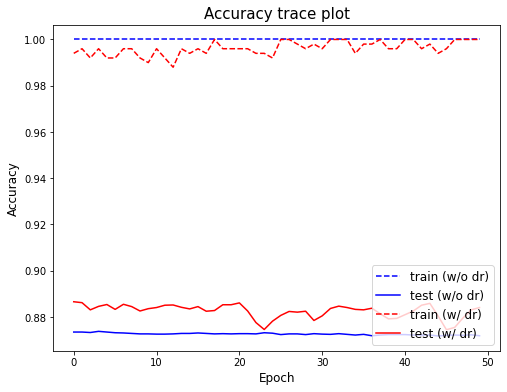

313/313 [==============================] - 1s 2ms/step - loss: 0.4930 - accuracy: 0.8899
Model stats (w/o dropout)
...accuracy: 0.882, loss: 0.542
Model stats (w/ dropout)
...accuracy: 0.890, loss: 0.493


In [ ]:
plt.figure(figsize=(8,6))
plt.plot(hist.history['accuracy'][50:100], 'b--', label='train (w/o dr)')
plt.plot(hist.history['val_accuracy'][50:100], 'b-', label='test (w/o dr)')
plt.plot(hist_dr.history['accuracy'][50:100], 'r--', label='train (w/ dr)')
plt.plot(hist_dr.history['val_accuracy'][50:100], 'r-', label='test (w/ dr)')
#plt.ylim([0.96,1.005])
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.title('Accuracy trace plot', fontsize=15)
plt.show()

sc = model.evaluate(test_x, test_y)
sc_dr = model_dr.evaluate(test_x, test_y)
print('Model stats (w/o dropout)')
print('...accuracy: %.3f, loss: %.3f'%(sc[1], sc[0]))
print('Model stats (w/ dropout)')
print('...accuracy: %.3f, loss: %.3f'%(sc_dr[1], sc_dr[0]))